4728.8099


c:\Users\5c1cz\Desktop\gg\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


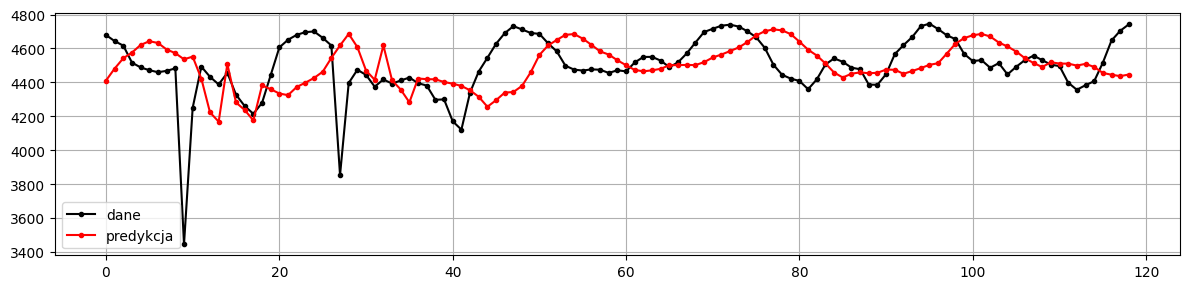

In [378]:
import numpy as np
from sklearn.neural_network import MLPRegressor
np.random.seed(2137)

def get_windows(signal, n):
    n_max = len(signal) - n
    X = np.array([signal[i:i+n] for i in range(n_max)])
    y = signal[n:]
    return X, y

data = np.genfromtxt("./press1.csv")
print(data[0])
X, y = get_windows(data, 8)
#minsquare error sqaured true


def train_validate_test(data, trainf, validatef, testf):
    indexes = np.arange(len(data))
    #np.random.shuffle(indexes)
    count = len(indexes)
    train, validate, test = int(count*trainf), int(count*validatef), int(count* testf)
    train_index, validate_index, test_index = indexes[:train], indexes[train:train+validate], indexes[train+validate+1:]
    
    return train_index, validate_index, test_index

train_index, validate_index, test_index = train_validate_test(np.arange(len(X)), 0.6, 0.2, 0.2)

train_x = X[train_index]
train_y = y[train_index]

layers = [4, 3]

validate_x = X[validate_index]
validate_y = y[validate_index]


test_x = X[test_index]
test_y = y[test_index]

nn = MLPRegressor(hidden_layer_sizes=layers, max_iter=1000)
nn.fit(train_x, train_y)
yn = nn.predict(test_x)

import matplotlib.pyplot as plt
plt.figure('data/prediction', figsize=(12, 3))
plt.plot(y[test_index], 'k.-', label='dane')
plt.plot(yn, 'r.-', label='predykcja')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

In [379]:
import numpy as np

def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

# Example usage
actual_values = test_y
predicted_values = yn

rmse_value = rmse(actual_values, predicted_values)
print("RMSE:", rmse_value)

RMSE: 205.01709108860683


In [395]:
# wagi dostępne w zmiennych
# coefs_
# intercepts_


def predict(inputs, coefs, intercepts):
    
    def step(data, coef, intercept):
        s1 = np.sum(coef.T * data, axis=1)
        return np.maximum(0, s1 + intercept)

    results = []
    for input in inputs:
        for layer_index in range(len(intercepts)):
            input = step(input, coefs[layer_index], intercepts[layer_index])
        results.append(input)
    return np.array(results)


res = predict(test_x, nn.coefs_, nn.intercepts_)

for i, _ in enumerate(yn):
    if (yn[i] != res[i][0]):
        print(i, yn[i], res[i][0])

0 4410.920069658309 4410.92006965831
1 4481.868536463333 4481.868536463332
2 4542.536531287747 4542.5365312877475
5 4642.979965752345 4642.9799657523445
8 4572.607911462226 4572.607911462227
15 4281.521883848929 4281.521883848928
18 4382.543607113927 4382.5436071139275
22 4372.945055433997 4372.945055433998
23 4398.313626443455 4398.313626443456
27 4617.93357540541 4617.933575405409
28 4686.206020171619 4686.206020171617
29 4608.056762049514 4608.056762049513
31 4415.434689575389 4415.434689575387
39 4402.253326982819 4402.253326982818
49 4459.813715724009 4459.81371572401
50 4561.89855111272 4561.898551112721
51 4617.876421411445 4617.876421411444
53 4680.463776497067 4680.463776497068
55 4658.148052907116 4658.148052907115
64 4480.264402302956 4480.264402302955
67 4503.053545559476 4503.053545559475
71 4564.407051529608 4564.407051529607
77 4712.836090254114 4712.836090254116
79 4684.586927383615 4684.586927383613
83 4511.678898342169 4511.678898342168
84 4457.844341345928 4457.84434